In [1]:
# load data
import pandas as pd
df = pd.read_csv("./Data/SortedPOIs.csv")
TOTAL = len(df)+1
COL = df.columns
print(TOTAL) # 1157571
# orders = df.iloc[:,2]
# #print(orders)
# dfh = pd.read_csv("./Data/hilbert.csv")
# print(len(dfh))
# df.iloc[:,3]=dfh
print(df)

1157571
               x          y      combined    order   order2  prediction
0       -85.0511  -96.00330 -3.061840e+09        0        0         NaN
1       -85.0511  -95.97350 -3.061840e+09        1        1         NaN
2       -85.0494  -80.88040 -3.061778e+09        2        2         NaN
3       -84.9574   88.66650 -3.058466e+09        3        3         NaN
4       -84.9463   88.72900 -3.058067e+09        4        4         NaN
5       -84.9463   88.72900 -3.058067e+09        5        5         NaN
6       -84.9463   88.72900 -3.058067e+09        6        6         NaN
7       -84.9463   88.72900 -3.058067e+09        7        7         NaN
8       -84.8686   88.58830 -3.055270e+09        8        8         NaN
9       -83.8626 -160.31200 -3.019054e+09        9        9         NaN
10      -83.7507   85.75520 -3.015025e+09       10       10         NaN
11      -83.0072   88.59010 -2.988259e+09       11       11         NaN
12      -83.0034   97.15430 -2.988122e+09       12      

In [2]:
# http://scikit-learn.org/stable/developers/performance.html
from sklearn import linear_model
from sklearn import ensemble
import ipdb
import time

stages = [1,10,100]
index = []
data = []

start_time=time.time()

for i in range(len(stages)):
    temp = []
    for j in range(stages[i]):
        df_ = pd.DataFrame(columns=COL)
        temp.append(df_)
    data.append(temp)
    
data[0][0] = df
nodatacount = 0

for i in range(len(stages)):
    temp = []
    print("======stage:"+str(i)+"======")
    
    for j in range(stages[i]):
        print("model:"+str(j))
        if len(data[i][j]) == 0:
            nodatacount += 1
            lr = index[0][0]
        else: 
            lr = ensemble.GradientBoostingRegressor()
#             lr = linear_model.LinearRegression()
#             train_x = data[i][j].iloc[:,0:2]
#             train_y = data[i][j].iloc[:,2]
            train_x = data[i][j]['x'].reshape(-1, 1)
            train_y = data[i][j]['order2']
            lr.fit(train_x,train_y)
        temp.append(lr)
        # allocate data
        if i < len(stages)-1:
            predicted = lr.predict(train_x)
            for pi in range(len(predicted)): # do not change the prediction
                #print(item)
                if predicted[pi] < 0:
                    predicted[pi] = 0
                if predicted[pi] >= TOTAL:
                    predicted[pi] = TOTAL-1   
            ModelID = ((predicted/TOTAL)*stages[i+1]).astype(int)
            data[i][j].iloc[:,-1]=ModelID
            for k in range(stages[i+1]):
                data[i+1][k] = data[i+1][k].append(data[i][j].loc[data[i][j]['prediction'] == k])
#             too slow!
#             for k in range(len(ModelID)):
#                 data[i+1][ModelID[k]].loc[data[i+1][ModelID[k]].size/3]=data[i][j].iloc[k,:]
#                 if k % 1000 == 0:
#                     print(k)
    index.append(temp)

elapsed_time = time.time() - start_time
print(elapsed_time)
print(nodatacount)

======stage:0======
model:0


D:\anaconda\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


======stage:1======
model:0
model:1
model:2
model:3
model:4
model:5
model:6
model:7
model:8
model:9
======stage:2======
model:0
model:1
model:2
model:3
model:4
model:5
model:6
model:7
model:8
model:9
model:10
model:11
model:12
model:13
model:14
model:15
model:16
model:17
model:18
model:19
model:20
model:21
model:22
model:23
model:24
model:25
model:26
model:27
model:28
model:29
model:30
model:31
model:32
model:33
model:34
model:35
model:36
model:37
model:38
model:39
model:40
model:41
model:42
model:43
model:44
model:45
model:46
model:47
model:48
model:49
model:50
model:51
model:52
model:53
model:54
model:55
model:56
model:57
model:58
model:59
model:60
model:61
model:62
model:63
model:64
model:65
model:66
model:67
model:68
model:69
model:70
model:71
model:72
model:73
model:74
model:75
model:76
model:77
model:78
model:79
model:80
model:81
model:82
model:83
model:84
model:85
model:86
model:87
model:88
model:89
model:90
model:91
model:92
model:93
model:94
model:95
model:96
model:97
model:98

D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


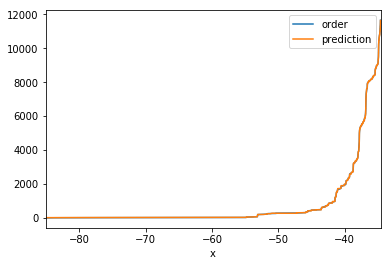

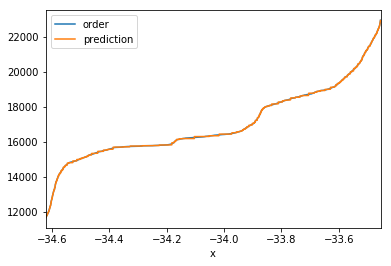

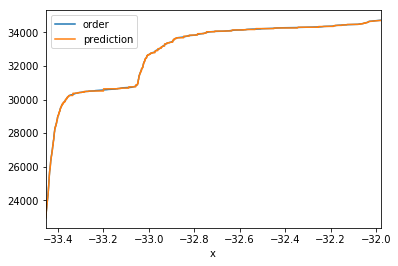

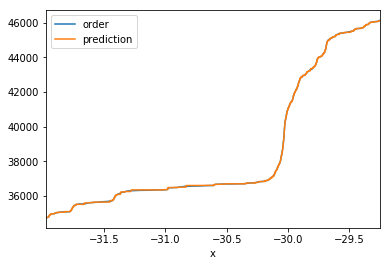

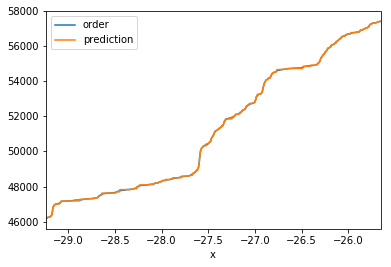

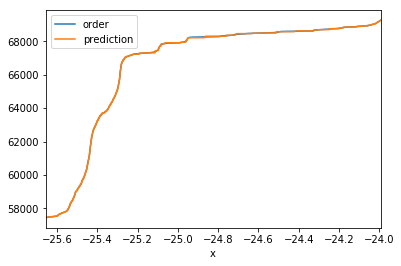

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(6):
    data[2][i]['prediction']=index[2][i].predict(data[2][i]['x'].reshape(-1, 1))
    data[2][i].plot(x='x',y=['order','prediction'])
plt.show()